<a href="https://www.kaggle.com/code/dishaasinghi/black-friday-eda-and-feature-engineering?scriptVersionId=126644544" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/black-friday/train.csv
/kaggle/input/black-friday/test.csv


# Import all necessary libraries 

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
data_train = pd.read_csv('/kaggle/input/black-friday/train.csv')
data_train.drop('Product_ID', axis=1, inplace=True)

In [42]:
data_train.replace(to_replace='F', value=1, inplace=True)
data_train.replace(to_replace='M', value=0, inplace=True)

In [43]:
data_train.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,1,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,1,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,1,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,1,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,0,55+,16,C,4+,0,8,NaN,NaN,7969


In [44]:
data_test = pd.read_csv('/kaggle/input/black-friday/test.csv')

In [45]:
data_test.replace(to_replace='F', value=1, inplace=True)
data_test.replace(to_replace='M', value=0, inplace=True)
data_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,0,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,0,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,1,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,1,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,1,26-35,1,C,1,0,4,5.0,12.0


In [46]:
data_test.drop('Product_ID', axis=1, inplace=True)

In [47]:
#Merging both test and training data
data = data_train.append(data_test)

In [48]:
data.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,1,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,1,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,1,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,1,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,0,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [49]:
data.describe()

,User_ID,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.00000,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,0.24709,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,0.43132,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.00000,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,0.00000,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,0.00000,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,0.00000,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,1.00000,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [50]:
data_train.isnull().sum()

User_ID                            0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [51]:
data.replace(to_replace='F', value=1, inplace=True)
data.replace(to_replace='M', value=0, inplace=True)

In [52]:
data.head().reset_index()

,index,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1000001,1,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1,1000001,1,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,2,1000001,1,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,3,1000001,1,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,4,1000002,0,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [53]:
data.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,1,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,1,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,1,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,1,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,0,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [54]:
data.drop(['City_Category'], axis=1, inplace=True)

In [55]:
##For dealing with missing values we usually relpace null values with the mode
data['Product_Category_3'].mode(dropna=True)[0]
data['Product_Category_2'].mode(dropna=True)[0]
data['Product_Category_1'].mode(dropna=True)[0]

5

In [56]:
data['Product_Category_3']=data['Product_Category_3'].fillna(data['Product_Category_3'].mode(dropna=True)[0])
data['Product_Category_2']=data['Product_Category_2'].fillna(data['Product_Category_2'].mode(dropna=True)[0])
data['Product_Category_1']=data['Product_Category_1'].fillna(data['Product_Category_1'].mode(dropna=True)[0])

In [57]:
data.head()

,User_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,1,0-17,10,2,0,3,8.0,16.0,8370.0
1,1000001,1,0-17,10,2,0,1,6.0,14.0,15200.0
2,1000001,1,0-17,10,2,0,12,8.0,16.0,1422.0
3,1000001,1,0-17,10,2,0,12,14.0,16.0,1057.0
4,1000002,0,55+,16,4+,0,8,8.0,16.0,7969.0


In [58]:
data['Stay_In_Current_City_Years']= data['Stay_In_Current_City_Years'].map({'4+':4})

In [59]:
data.groupby('Gender').size()
data.groupby('Occupation').size().reset_index()

,Occupation,0
0,0,98850
1,1,67687
2,2,37996
3,3,25126
4,4,103086
5,5,17373
6,6,29102
7,7,84127
8,8,2189
9,9,8929


<AxesSubplot:xlabel='Product_Category_1', ylabel='Count'>

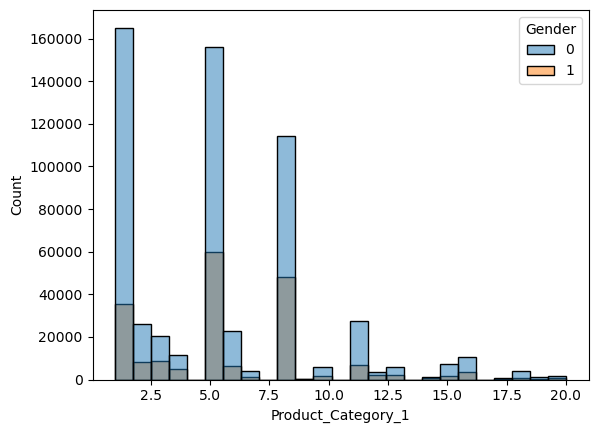

In [60]:
sns.histplot(data=data, x='Product_Category_1', hue='Gender', bins=25)

In [61]:
data_train =[~data['Purchase'].isnull()]

In [62]:
data_test = data['Purchase'].isnull()

In [63]:
data_test.reset_index()

,index,Purchase
0,0,False
1,1,False
2,2,False
3,3,False
4,4,False
...,...,...
783662,233594,True
783663,233595,True
783664,233596,True
783665,233597,True


In [64]:
X=data_train

In [65]:
y=data_train[:-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.replace('M',0, inplace=True)
X_train.replace('F',1, inplace=True)
X_test.replace('M',, inplace=True)
X_test.replace('F',1, inplace=True)

In [ ]:
X_train.drop('Purchase', axis=1)
X_test.drop('Purchase', axis=1)

In [ ]:
X_train['Age'].replace('0-17', 1, inplace=True)
X_train['Age'].replace('18-25', 2,  inplace=True)
X_train['Age'].replace('26-35', 3,  inplace=True)
X_train['Age'].replace('36-45', 4,  inplace=True)
X_train['Age'].replace('46-50', 5,  inplace=True)
X_train['Age'].replace('51-55', 6,  inplace=True)
X_train['Age'].replace('55+', 7,  inplace=True)
X_train['City_Category'].replace('B', 2,  inplace=True)
X_train['City_Category'].replace('C', 1,  inplace=True)
X_train['City_Category'].replace('A', 0,  inplace=True)
X_train['Stay_In_Current_City_Years'].replace('4+', 4,  inplace=True)
X_test['Age'].replace('0-17', 1, inplace=True)
X_test['Age'].replace('18-25', 2,  inplace=True)
X_test['Age'].replace('26-35', 3,  inplace=True)
X_test['Age'].replace('36-45', 4,  inplace=True)
X_test['Age'].replace('46-50', 5,  inplace=True)
X_test['Age'].replace('51-55', 6,  inplace=True)
X_test['Age'].replace('55+', 7,  inplace=True)
X_test['City_Category'].replace('B', 2,  inplace=True)
X_test['City_Category'].replace('C', 1,  inplace=True)
X_test['City_Category'].replace('A', 0,  inplace=True)
X_test['Stay_In_Current_City_Years'].replace('4+', 4,  inplace=True)

In [ ]:
#Standard Scaler is used for standardizing the values with mean as 0 and deviation as 1
from sklearn.preprocessing import StandardScaler
#Used for computing the standardization
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

I have done a way lengthier process, you may use map function instead of replace, that is less time consuming 